### import connection (ConnectOracleDB) : run .ipynb file 

In [292]:
import warnings
%run ConnectOracleDB.ipynb

## Loading GFK table with Pandas 

In [293]:
table_name = 'DWH_COE.GFK_SUBS'
df = fetch_table_as_dataframe(table_name)


# Exploratory Data Analysis

## import Packages

In [294]:
# Data analysis and wrangling
import pandas as pd
import numpy as np

# Data visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

# Remove warnings
import warnings
warnings.filterwarnings('ignore')

## DataFrame Basics

In [295]:
df.head(5)

,SUBS_ID,SERVICE_NO,PARTY_CERT_NUMBER,SUBSCRIBER_LIFECYCLE_STATUS,ACTIVATION_DATE,STATUS_DESC_NAME,SUBS_TARIFF_PLAN,PROD_NAME,ACCESS_MODE,TYPE_OF_OWNERSHIP,...,LAST_2M_USAGE_VOICE_I,LAST_2M_USAGE_SMS_O,LAST_2M_USAGE_SMS_I,LAST_2M_CHARGE,LAST_3M_USAGE_GPRS,LAST_3M_USAGE_VOICE_O,LAST_3M_USAGE_VOICE_I,LAST_3M_USAGE_SMS_O,LAST_3M_USAGE_SMS_I,LAST_3M_CHARGE
0,2.570876e+07,557949776,08001023652,Active,2010-03-19 16:04:23,Partial by credit check,Lai-Lai standard,Mobile Phone,MOBILE,Individual person,...,9596.0,NaN,120.0,0.000000,NaN,6304.0,23066.0,13.0,157.0,9.435972
1,1.001276e+09,OI32404754,55001002245,Active,2017-08-24 14:10:48,Forced by debt,"Silk internet package ""Start +"" 25 MB , 35 GEL...",Fix Internet,FTTH,Individual person,...,NaN,NaN,NaN,33.510639,NaN,NaN,NaN,NaN,NaN,33.510639
2,2.514739e+07,555253078,61001067765,Active,2011-10-31 12:57:04,Partial by credit check,Lai-Lai standard,Mobile Phone,MOBILE,Individual person,...,21233.0,1.0,201.0,4.629648,5.208005e+10,31198.0,30646.0,14.0,254.0,49.580885
3,2.625034e+07,593274695,01005015641,Partial,2003-02-05 07:00:00,Partial by credit check,Lai-Lai standard,Mobile Phone,MOBILE,Individual person,...,31656.0,69.0,877.0,77.367519,1.595498e+10,9040.0,22840.0,24.0,656.0,38.000586
4,2.441348e+07,557583435,53001043995,Active,2012-08-12 13:13:44,Partial by credit check,Lai-Lai standard,Mobile Phone,MOBILE,Individual person,...,874.0,NaN,105.0,11.552000,5.199683e+08,1179.0,653.0,2.0,100.0,12.036000


In [296]:
dev_man = df["DEVICE_MANUFACTURER"]
filter_dev_man = dev_man[dev_man.isin(dev_man.value_counts().index[dev_man.value_counts()>50])]
#dev_man.value_counts()>50
filter_dev_man.value_counts()

Samsung                              6763
Apple                                3481
Xiaomi                               2213
Huawei                               1018
Hmd Global Oy                         672
Nokia                                 642
Realme                                192
Microsoft Mobile                      161
Lenovo                                114
LG                                    101
Geecoo Technology (Italy) Limited      99
Tecno Telecom                          87
Google                                 81
F-Plus                                 73
Itel Technology Limited                72
TCL                                    67
Motorola                               59
Sony                                   57
Xinchuangxin                           53
Fly Mobiles                            52
Name: DEVICE_MANUFACTURER, dtype: int64

In [297]:
pred_man = dev_man.isin(dev_man.value_counts().index[dev_man.value_counts()>50])

# Filter : Mobile Subs

In [298]:
df = df[df["ACCESS_MODE"]=='MOBILE']

## Unique Silknet packets 

In [299]:
(df["SUBS_TARIFF_PLAN"].unique())

array(['Lai-Lai standard', 'Geocell 01', 'Geocell 10', 'SME',
       'LTE Internet Project', 'Hallo'], dtype=object)

# Unique Device_Models

In [300]:
devices = df["DEVICE_MODEL"]
filtered_Devices = devices[devices.isin(devices.value_counts().index[devices.value_counts()>=25])]
filtered_Devices.value_counts

<bound method IndexOpsMixin.value_counts of 0                  Tank 1
2              Galaxy A52
3                iPhone 7
4           iPhone 8 Plus
5              Galaxy A52
               ...       
39720          Galaxy A22
39722    Galaxy A3 (2016)
39723            P30 Lite
39728       iPhone 13 PRO
39744         Galaxy A30S
Name: DEVICE_MODEL, Length: 11571, dtype: object>

In [301]:
pred_dev= devices.isin(devices.value_counts().index[devices.value_counts()>=25])
df[pred_dev]

,SUBS_ID,SERVICE_NO,PARTY_CERT_NUMBER,SUBSCRIBER_LIFECYCLE_STATUS,ACTIVATION_DATE,STATUS_DESC_NAME,SUBS_TARIFF_PLAN,PROD_NAME,ACCESS_MODE,TYPE_OF_OWNERSHIP,...,LAST_2M_USAGE_VOICE_I,LAST_2M_USAGE_SMS_O,LAST_2M_USAGE_SMS_I,LAST_2M_CHARGE,LAST_3M_USAGE_GPRS,LAST_3M_USAGE_VOICE_O,LAST_3M_USAGE_VOICE_I,LAST_3M_USAGE_SMS_O,LAST_3M_USAGE_SMS_I,LAST_3M_CHARGE
0,2.570876e+07,557949776,08001023652,Active,2010-03-19 16:04:23,Partial by credit check,Lai-Lai standard,Mobile Phone,MOBILE,Individual person,...,9596.0,NaN,120.0,0.000000,NaN,6304.0,23066.0,13.0,157.0,9.435972
2,2.514739e+07,555253078,61001067765,Active,2011-10-31 12:57:04,Partial by credit check,Lai-Lai standard,Mobile Phone,MOBILE,Individual person,...,21233.0,1.0,201.0,4.629648,5.208005e+10,31198.0,30646.0,14.0,254.0,49.580885
3,2.625034e+07,593274695,01005015641,Partial,2003-02-05 07:00:00,Partial by credit check,Lai-Lai standard,Mobile Phone,MOBILE,Individual person,...,31656.0,69.0,877.0,77.367519,1.595498e+10,9040.0,22840.0,24.0,656.0,38.000586
4,2.441348e+07,557583435,53001043995,Active,2012-08-12 13:13:44,Partial by credit check,Lai-Lai standard,Mobile Phone,MOBILE,Individual person,...,874.0,NaN,105.0,11.552000,5.199683e+08,1179.0,653.0,2.0,100.0,12.036000
5,2.839104e+07,574889384,01011082634,Partial,2015-09-18 12:02:28,Partial by credit check,Lai-Lai standard,Mobile Phone,MOBILE,Individual person,...,884.0,7.0,489.0,14.829937,1.251777e+10,5531.0,4943.0,6.0,1122.0,26.898828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39720,2.601575e+07,558571085,01001010822,Partial,2008-07-07 17:45:16,Partial by credit check,Lai-Lai standard,Mobile Phone,MOBILE,Individual person,...,12175.0,8.0,539.0,13.324226,8.549179e+09,8682.0,12049.0,20.0,508.0,24.618507
39722,2.550632e+07,593394821,61002019828,Active,2005-11-08 16:31:35,Partial by no refil,Lai-Lai standard,Mobile Phone,MOBILE,Individual person,...,11.0,5.0,25.0,1.150000,NaN,879.0,99.0,6.0,81.0,3.512000
39723,1.773910e+09,555743336,16052139322,Forced,2022-12-12 14:26:28,Partial by no refil,Lai-Lai standard,Mobile Phone,MOBILE,Individual person,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.500000
39728,2.854748e+07,555504465,42001037538,Active,2016-01-09 18:00:45,Partial by credit check,Lai-Lai standard,Mobile Phone,MOBILE,Individual person,...,7611.0,NaN,390.0,26.160000,4.296290e+10,519.0,977.0,6.0,430.0,52.503421


In [387]:
dev_2comp = df[pred_dev & pred_man][["DEVICE_MODEL","DEVICE_MANUFACTURER"]]
dev_2comp.drop_duplicates(subset=['DEVICE_MODEL','DEVICE_MANUFACTURER'])

arr =dev_2comp["DEVICE_MANUFACTURER"] +' ' + dev_2comp["DEVICE_MODEL"]
arr1 = arr.unique()

In [388]:
npArr_Models = filtered_Devices.unique()

npArr_Models

array(['Tank 1', 'Galaxy A52', 'iPhone 7', 'iPhone 8 Plus',
       'Galaxy J2 Prime Plus', 'iPhone 11', '105 (2017)',
       'Nokia 150/Nokia 150 DS/RM-1190', 'Galaxy J7 (2016)', '105',
       'Galaxy A20S', 'Galaxy A12', '1280', 'Galaxy A21S', 'Galaxy A03S',
       'P20 Lite', 'Galaxy A2 Core', 'Galaxy A71', 'iPhone 7 Plus',
       'Galaxy A13 4G', 'Galaxy A04S', 'iPhone 11 PRO MAX',
       '6700/C12/C3000/Inova TE 5217', 'Galaxy A40', 'iPhone 11 PRO',
       'Galaxy J5 (2016)', 'iPhone XR', 'iPhone 13 PRO', 'Galaxy A23',
       'Galaxy A50', 'Galaxy J2 (2018)', 'Galaxy A10', 'Redmi 9',
       'Redmi 9T', 'Galaxy S21 FE 5G', 'iPhone 12 PRO', 'iPhone 14 PRO',
       'Redmi 9A', 'Nokia 105', 'Galaxy A02', 'Galaxy A31', 'Redmi 10C',
       'Galaxy A20', 'Galaxy A32/Galaxy A32 LTE', 'Redmi Note 8',
       'Galaxy J3 (2016)', 'Redmi Note 10s', 'iPhone 13 PRO MAX',
       'Redmi 9C', 'Redmi Note 7', 'iPhone 13', 'Galaxy S8', 'Galaxy A51',
       'Galaxy J3 2017', 'Galaxy A33 5G', 'Galaxy J5

In [389]:
import numpy as np
from scipy.cluster.hierarchy import linkage, fcluster
from Levenshtein import distance

# Sample list of device models
device_models = arr1

# Calculate pairwise Levenshtein distances
arr_len = len(device_models)
distance_matrix = np.zeros((arr_len, arr_len))

for i in range(arr_len):
    for j in range(arr_len):
        distance_matrix[i, j] = distance(device_models[i], device_models[j])

# Perform hierarchical clustering
linkage_matrix = linkage(distance_matrix, method='single')

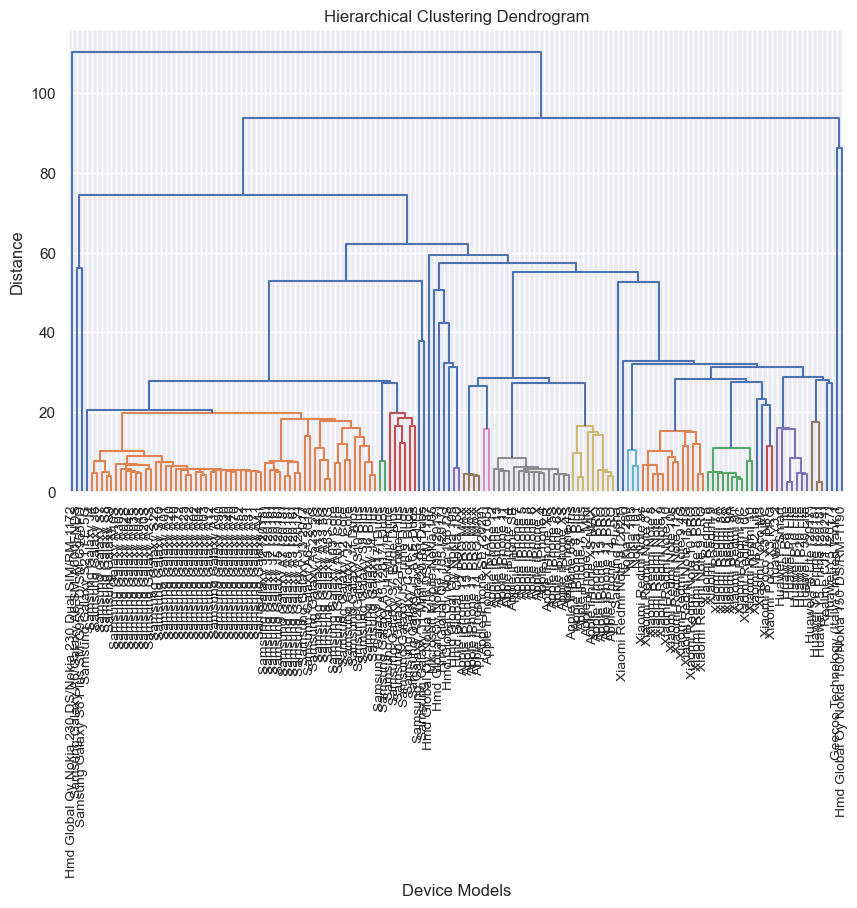

In [390]:
# Plot the dendrogram
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, labels=device_models, leaf_rotation=90 , leaf_font_size=10, color_threshold=20)
plt.xlabel('Device Models')
plt.ylabel('Distance')
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

In [391]:
def longest_common_substring(s, t):
    m = len(s)
    n = len(t)

    # Create a table to store lengths of longest common suffixes of substrings
    # `table[i][j]` will store the length of the longest common suffix of `s[0...i-1]` and `t[0...j-1]`
    table = [[0] * (n + 1) for _ in range(m + 1)]

    # Length of the longest common suffix
    max_length = 0
    # Ending index of the longest common suffix in `s`
    end_index = 0

    for i in range(1, m + 1):
        for j in range(1, n + 1):
            if s[i - 1] == t[j - 1]:
                table[i][j] = table[i - 1][j - 1] + 1
                if table[i][j] > max_length:
                    max_length = table[i][j]
                    end_index = i

    # Extract the longest common substring from the end_index and max_length
    longest_substring = s[end_index - max_length:end_index]

    return longest_substring

# Example usage
string1 = "abcdef"
string2 = "bcdofe"
result = longest_common_substring(string1, string2)
print(result)


bcd


In [392]:
# Set a threshold to cut the dendrogram into clusters
threshold = 25  # Adjust this threshold based on your data and desired level of similarity
cluster_assignments = fcluster(linkage_matrix, threshold, criterion='distance')

# Count the size of each cluster
cluster_sizes = np.bincount(cluster_assignments)

# Create a dictionary to store device models in each cluster
clusters = {}
for i, cluster_id in enumerate(cluster_assignments):
    device_model = device_models[i]
    if cluster_sizes[cluster_id] <= 1:  # If cluster size is small (adjust the threshold)
        # Assign the device model to another cluster with a larger size
        new_cluster_id = np.argmax(cluster_sizes)  # Find the cluster with the largest size
        cluster_sizes[new_cluster_id] += 1
        cluster_id = new_cluster_id
    if cluster_id not in clusters:
        clusters[cluster_id] = []
    clusters[cluster_id].append(device_model)

# Print the clusters
# print(len(clusters.items())) -  10 clusters

for cluster_id, device_models in clusters.items():
    print(f"Cluster {cluster_id}: {device_models}")

Cluster 3: ['Geecoo Technology (Italy) Limited Tank 1', 'Samsung Galaxy A52', 'Hmd Global Oy 105 (2017)', 'Hmd Global Oy Nokia 150/Nokia 150 DS/RM-1190', 'Samsung Galaxy J7 (2016)', 'Samsung Galaxy A20S', 'Samsung Galaxy A12', 'Samsung Galaxy A21S', 'Samsung Galaxy A03S', 'Samsung Galaxy A2 Core', 'Samsung Galaxy A71', 'Samsung Galaxy A13 4G', 'Samsung Galaxy A04S', 'Samsung Galaxy A40', 'Samsung Galaxy J5 (2016)', 'Samsung Galaxy A23', 'Samsung Galaxy A50', 'Samsung Galaxy J2 (2018)', 'Samsung Galaxy A10', 'Samsung Galaxy S21 FE 5G', 'Microsoft Mobile Nokia 105', 'Samsung Galaxy A02', 'Samsung Galaxy A31', 'Samsung Galaxy A20', 'Samsung Galaxy A32/Galaxy A32 LTE', 'Samsung Galaxy J3 (2016)', 'Samsung Galaxy S8', 'Samsung Galaxy A51', 'Samsung Galaxy J3 2017', 'Samsung Galaxy A33 5G', 'Samsung Galaxy A10S', 'Samsung Galaxy A03 Core', 'Samsung Galaxy A70', 'Samsung Galaxy J2 Core', 'Samsung Galaxy A6/Galaxy A6 SM-A600FNDS', 'Samsung Galaxy A6+ 2018', 'Samsung Galaxy J4', 'Samsung Galaxy

In [365]:
for i,j in clusters.items():
    if i==13:
        Samsung = j

    
def lcs(Claster,start_word):
    lcs = start_word
    for i in range(0,len(Claster)):
        lcs = longest_common_substring(lcs,Claster[i])
    return lcs
lcs(Samsung,"Samsung")

''

In [361]:
# import numpy as np
# from scipy.cluster.hierarchy import linkage, fcluster
# from Levenshtein import distance

# # Sample list of device models
# device_models = Samsung

# # Calculate pairwise Levenshtein distances
# arr_len = len(device_models)
# distance_matrix = np.zeros((arr_len, arr_len))

# for i in range(arr_len):
#     for j in range(arr_len):
#         distance_matrix[i, j] = distance(device_models[i], device_models[j])

# # Perform hierarchical clustering
# linkage_matrix = linkage(distance_matrix, method='single')
# # Set a threshold to cut the dendrogram into clusters
# threshold = 5  # Adjust this threshold based on your data and desired level of similarity
# cluster_assignments = fcluster(linkage_matrix, threshold, criterion='distance')

# # Count the size of each cluster
# cluster_sizes = np.bincount(cluster_assignments)

# # Create a dictionary to store device models in each cluster
# clusters = {}
# for i, cluster_id in enumerate(cluster_assignments):
#     device_model = device_models[i]
#     if cluster_sizes[cluster_id] <= 1:  # If cluster size is small (adjust the threshold)
#         # Assign the device model to another cluster with a larger size
#         new_cluster_id = np.argmax(cluster_sizes)  # Find the cluster with the largest size
#         cluster_sizes[new_cluster_id] += 1
#         cluster_id = new_cluster_id
#     if cluster_id not in clusters:
#         clusters[cluster_id] = []
#     clusters[cluster_id].append(device_model)

# # Print the clusters
# # print(len(clusters.items())) -  10 clusters

# for cluster_id, device_models in clusters.items():
#     print(f"Cluster {cluster_id}: {device_models}")

In [362]:
def encode(dict_items,key):
    for i,j in dict_items:
        if key in j:
            return i
    return 0

In [366]:
encode(clusters.items(),'Samsung Galaxy A20S')

3

### K-Means Clastering on Device_Models

In [351]:
dev = [i for i in df.columns if "DEVICE" in i]
print(dev)
df[dev].info()

['DEVICE_TYPE', 'DEVICE_MODEL_RELEASE_YEAR', 'DEVICE_MANUFACTURER', 'DEVICE_MODEL', 'DEVICE_OS_NAME', 'DEVICE_LATEST_DAYS', 'DEVICES_USED']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 21261 entries, 0 to 39744
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   DEVICE_TYPE                17519 non-null  object 
 1   DEVICE_MODEL_RELEASE_YEAR  17382 non-null  object 
 2   DEVICE_MANUFACTURER        17519 non-null  object 
 3   DEVICE_MODEL               17518 non-null  object 
 4   DEVICE_OS_NAME             17519 non-null  object 
 5   DEVICE_LATEST_DAYS         17655 non-null  float64
 6   DEVICES_USED               16658 non-null  float64
dtypes: float64(2), object(5)
memory usage: 1.8+ MB


In [352]:
devs = df[dev].dropna()
devs

,DEVICE_TYPE,DEVICE_MODEL_RELEASE_YEAR,DEVICE_MANUFACTURER,DEVICE_MODEL,DEVICE_OS_NAME,DEVICE_LATEST_DAYS,DEVICES_USED
0,Basic Phone,2018,Geecoo Technology (Italy) Limited,Tank 1,Proprietary,391.0,6.0
2,Phablet,2020,Samsung,Galaxy A52,Android OS,88.0,2.0
3,Smartphone,2016,Apple,iPhone 7,iOS,1645.0,1.0
4,Phablet,2017,Apple,iPhone 8 Plus,iOS,775.0,2.0
5,Phablet,2020,Samsung,Galaxy A52,Android OS,70.0,9.0
...,...,...,...,...,...,...,...
39721,USB Modem,2017,Shenzhen Coban,303FG,Proprietary,546.0,1.0
39722,Smartphone,2015,Samsung,Galaxy A3 (2016),Android OS,746.0,2.0
39723,Phablet,2019,Huawei,P30 Lite,Android OS,7.0,1.0
39728,Phablet,2021,Apple,iPhone 13 PRO,iOS,83.0,3.0


In [353]:
dev_mobiles = [i for i in devs["DEVICE_TYPE"].unique() if ("phone" in i.lower()) or i=="Tablet"]
#for i in devs["DEVICE_TYPE"].unique():
 #   print(devs[devs["DEVICE_TYPE"]==i].iloc[0])
dev_mobiles

['Basic Phone', 'Smartphone', 'Feature Phone', 'Tablet']

In [354]:
devs = devs[devs["DEVICE_TYPE"].isin(dev_mobiles)]
devs

,DEVICE_TYPE,DEVICE_MODEL_RELEASE_YEAR,DEVICE_MANUFACTURER,DEVICE_MODEL,DEVICE_OS_NAME,DEVICE_LATEST_DAYS,DEVICES_USED
0,Basic Phone,2018,Geecoo Technology (Italy) Limited,Tank 1,Proprietary,391.0,6.0
3,Smartphone,2016,Apple,iPhone 7,iOS,1645.0,1.0
8,Basic Phone,2013,Microsoft Mobile,Nokia 108,Proprietary,594.0,2.0
13,Feature Phone,2017,Hmd Global Oy,105 (2017),Proprietary,232.0,2.0
15,Feature Phone,2017,Hmd Global Oy,Nokia 150/Nokia 150 DS/RM-1190,Proprietary,146.0,4.0
...,...,...,...,...,...,...,...
39711,Smartphone,2022,Realme,RMX3624,Android OS,78.0,2.0
39713,Smartphone,2015,Samsung,Galaxy J1 Mini (2016) Duos,Android OS,58.0,1.0
39716,Smartphone,2014,Apple,iPhone 6,iOS,145.0,1.0
39717,Smartphone,2014,Apple,iPhone 6,iOS,7.0,1.0


In [356]:
price_mapping = {
    'Basic Phone': 'Low',
    'Smartphone': 'Medium',
    'Feature Phone': 'Low',
    'Tablet': 'High'
}
devs['PRICE_RANGE'] = devs['DEVICE_TYPE'].map(price_mapping)


In [357]:
devs["DEVICE_MODEL_RELEASE_YEAR"]=devs["DEVICE_MODEL_RELEASE_YEAR"].astype('int')
devs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5606 entries, 0 to 39722
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   DEVICE_TYPE                5606 non-null   object 
 1   DEVICE_MODEL_RELEASE_YEAR  5606 non-null   int32  
 2   DEVICE_MANUFACTURER        5606 non-null   object 
 3   DEVICE_MODEL               5606 non-null   object 
 4   DEVICE_OS_NAME             5606 non-null   object 
 5   DEVICE_LATEST_DAYS         5606 non-null   float64
 6   DEVICES_USED               5606 non-null   float64
 7   PRICE_RANGE                5606 non-null   object 
dtypes: float64(2), int32(1), object(5)
memory usage: 372.3+ KB


In [393]:
devs["DEVICE_TITLE"]= devs["DEVICE_MANUFACTURER"]+' '+devs["DEVICE_MODEL"]
devs["ENCODE_TITLE"]= devs["DEVICE_TITLE"].apply(lambda x: encode(clusters.items(),x))
devs["ENCODE_TITLE"].value_counts()

0     3004
15    1277
3      767
8      166
17     160
19      81
5       70
14      49
21      32
Name: ENCODE_TITLE, dtype: int64

In [394]:
devs

,DEVICE_TYPE,DEVICE_MODEL_RELEASE_YEAR,DEVICE_MANUFACTURER,DEVICE_MODEL,DEVICE_OS_NAME,DEVICE_LATEST_DAYS,DEVICES_USED,PRICE_RANGE,DEVICE_TITLE,ENCODE_TITLE
0,Basic Phone,2018,Geecoo Technology (Italy) Limited,Tank 1,Proprietary,391.0,6.0,Low,Geecoo Technology (Italy) Limited Tank 1,3
3,Smartphone,2016,Apple,iPhone 7,iOS,1645.0,1.0,Medium,Apple iPhone 7,15
8,Basic Phone,2013,Microsoft Mobile,Nokia 108,Proprietary,594.0,2.0,Low,Microsoft Mobile Nokia 108,0
13,Feature Phone,2017,Hmd Global Oy,105 (2017),Proprietary,232.0,2.0,Low,Hmd Global Oy 105 (2017),3
15,Feature Phone,2017,Hmd Global Oy,Nokia 150/Nokia 150 DS/RM-1190,Proprietary,146.0,4.0,Low,Hmd Global Oy Nokia 150/Nokia 150 DS/RM-1190,3
...,...,...,...,...,...,...,...,...,...,...
39711,Smartphone,2022,Realme,RMX3624,Android OS,78.0,2.0,Medium,Realme RMX3624,0
39713,Smartphone,2015,Samsung,Galaxy J1 Mini (2016) Duos,Android OS,58.0,1.0,Medium,Samsung Galaxy J1 Mini (2016) Duos,3
39716,Smartphone,2014,Apple,iPhone 6,iOS,145.0,1.0,Medium,Apple iPhone 6,15
39717,Smartphone,2014,Apple,iPhone 6,iOS,7.0,1.0,Medium,Apple iPhone 6,15


In [397]:
# encode - price-range

one_hot_encoded = pd.get_dummies(devs, columns=['PRICE_RANGE'], prefix=['PRICE'])

one_hot_encoded

,DEVICE_TYPE,DEVICE_MODEL_RELEASE_YEAR,DEVICE_MANUFACTURER,DEVICE_MODEL,DEVICE_OS_NAME,DEVICE_LATEST_DAYS,DEVICES_USED,DEVICE_TITLE,ENCODE_TITLE,PRICE_High,PRICE_Low,PRICE_Medium
0,Basic Phone,2018,Geecoo Technology (Italy) Limited,Tank 1,Proprietary,391.0,6.0,Geecoo Technology (Italy) Limited Tank 1,3,0,1,0
3,Smartphone,2016,Apple,iPhone 7,iOS,1645.0,1.0,Apple iPhone 7,15,0,0,1
8,Basic Phone,2013,Microsoft Mobile,Nokia 108,Proprietary,594.0,2.0,Microsoft Mobile Nokia 108,0,0,1,0
13,Feature Phone,2017,Hmd Global Oy,105 (2017),Proprietary,232.0,2.0,Hmd Global Oy 105 (2017),3,0,1,0
15,Feature Phone,2017,Hmd Global Oy,Nokia 150/Nokia 150 DS/RM-1190,Proprietary,146.0,4.0,Hmd Global Oy Nokia 150/Nokia 150 DS/RM-1190,3,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
39711,Smartphone,2022,Realme,RMX3624,Android OS,78.0,2.0,Realme RMX3624,0,0,0,1
39713,Smartphone,2015,Samsung,Galaxy J1 Mini (2016) Duos,Android OS,58.0,1.0,Samsung Galaxy J1 Mini (2016) Duos,3,0,0,1
39716,Smartphone,2014,Apple,iPhone 6,iOS,145.0,1.0,Apple iPhone 6,15,0,0,1
39717,Smartphone,2014,Apple,iPhone 6,iOS,7.0,1.0,Apple iPhone 6,15,0,0,1


In [404]:
devs_SetTrain = one_hot_encoded [['DEVICE_MODEL_RELEASE_YEAR','ENCODE_TITLE','PRICE_High','PRICE_Low','PRICE_Medium']]
devs_SetTrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5606 entries, 0 to 39722
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   DEVICE_MODEL_RELEASE_YEAR  5606 non-null   int32
 1   ENCODE_TITLE               5606 non-null   int64
 2   PRICE_High                 5606 non-null   uint8
 3   PRICE_Low                  5606 non-null   uint8
 4   PRICE_Medium               5606 non-null   uint8
dtypes: int32(1), int64(1), uint8(3)
memory usage: 125.9 KB


In [405]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Splitting data into features (X) and target (y)
X = devs_SetTrain.drop(['PRICE_High', 'PRICE_Low', 'PRICE_Medium'], axis=1)
y = devs_SetTrain[['PRICE_High', 'PRICE_Low', 'PRICE_Medium']]

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.82


In [408]:
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming you have a DataFrame named 'df' containing the columns you mentioned
X = devs_SetTrain.drop(['PRICE_High', 'PRICE_Low', 'PRICE_Medium'], axis=1)
y = devs_SetTrain[['PRICE_High', 'PRICE_Low', 'PRICE_Medium']]

# Perform clustering using KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
devs_SetTrain['Cluster'] = kmeans.fit_predict(X)

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.82


In [409]:
import pandas as pd
from sklearn.cluster import KMeans

# Assuming you have a DataFrame named 'df' containing the columns you mentioned
# Exclude the price-related columns
features = devs_SetTrain.drop(['PRICE_High', 'PRICE_Low', 'PRICE_Medium'], axis=1)

# Perform clustering using KMeans
num_clusters = 5  # Adjust the number of clusters as needed
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(features)

# Add cluster labels to the DataFrame
devs_SetTrain['Cluster'] = cluster_labels

# Print the DataFrame with cluster labels
print(devs_SetTrain)


       DEVICE_MODEL_RELEASE_YEAR  ENCODE_TITLE  PRICE_High  PRICE_Low  \
0                           2018             3           0          1   
3                           2016            15           0          0   
8                           2013             0           0          1   
13                          2017             3           0          1   
15                          2017             3           0          1   
...                          ...           ...         ...        ...   
39711                       2022             0           0          0   
39713                       2015             3           0          0   
39716                       2014            15           0          0   
39717                       2014            15           0          0   
39722                       2015             3           0          0   

       PRICE_Medium  Cluster  
0                 0        1  
3                 1        0  
8                 0        4  

In [410]:
devs_SetTrain.groupby("Cluster")

In [200]:
df[dev].select_dtypes(include=['number']).dropna().describe()

,DEVICE_LATEST_DAYS,DEVICES_USED
count,16644.000000,16644.000000
mean,350.885424,2.914564
std,411.495877,2.550511
min,1.000000,1.000000
25%,41.000000,1.000000
50%,182.000000,2.000000
75%,530.000000,4.000000
max,1645.000000,64.000000


In [193]:
X = df[dev].select_dtypes(include=['number']).dropna().values
X

array([[3.910e+02, 6.000e+00],
       [8.800e+01, 2.000e+00],
       [1.645e+03, 1.000e+00],
       ...,
       [7.000e+00, 1.000e+00],
       [8.300e+01, 3.000e+00],
       [1.331e+03, 2.000e+00]])

In [194]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')


In [195]:
y_kmeans = kmeans.fit_predict(X)

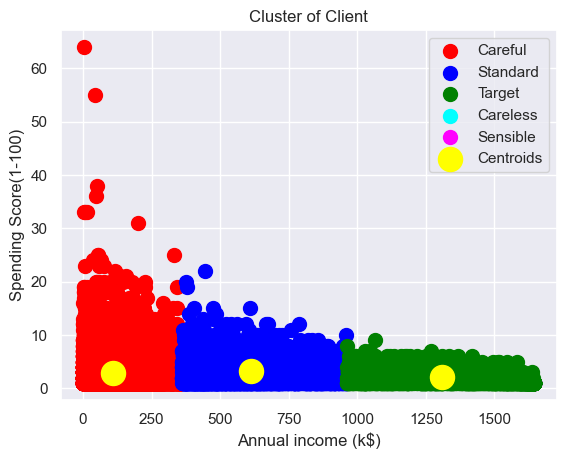

In [197]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, c='red', label = 'Careful')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, c='blue', label = 'Standard')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=100, c='green', label = 'Target')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=100, c='cyan', label = 'Careless')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s=100, c='magenta', label = 'Sensible')
# apply centroid for all cluster
plt.scatter(kmeans.cluster_centers_[:, 0] , kmeans.cluster_centers_[:, 1] , s=300, c='yellow', label = 'Centroids')
plt.title('Cluster of Client')
plt.xlabel('Annual income (k$)')
plt.ylabel('Spending Score(1-100)')
plt.legend()
plt.show()

# Clastering by Similarity of Devices

## Subscriber Level Data : Subs_df
     * demographics
     * device
     * usage pattern

In [320]:
Subs_var = [
    "SUBS_ID",
    "SERVICE_NO",
    "PARTY_CERT_NUMBER",
    "SUBSCRIBER_LIFECYCLE_STATUS",
    "ACTIVATION_DATE",
    "SUBS_TARIFF_PLAN",
    "DEVICE_TYPE",
    "DEVICE_MANUFACTURER",
    "GENDER",
    "YEAR_OF_BIRTH",
    "CUSTOMER_TYPE",
    "CHARGE_TOTAL",
    "CHARGE_RECURRING",
    "CHARGE_ONE_TIME"
    # Add more variables as needed
]
Subs_df = df [Subs_var]
Subs_df.head()

,SUBS_ID,SERVICE_NO,PARTY_CERT_NUMBER,SUBSCRIBER_LIFECYCLE_STATUS,ACTIVATION_DATE,SUBS_TARIFF_PLAN,DEVICE_TYPE,DEVICE_MANUFACTURER,GENDER,YEAR_OF_BIRTH,CUSTOMER_TYPE,CHARGE_TOTAL,CHARGE_RECURRING,CHARGE_ONE_TIME
0,25708755.0,557949776,08001023652,Active,2010-03-19 16:04:23,Lai-Lai standard,Basic Phone,Geecoo Technology (Italy) Limited,None,1954,Private Person,61.694066,NaN,53.8
2,25147393.0,555253078,61001067765,Active,2011-10-31 12:57:04,Lai-Lai standard,Phablet,Samsung,None,1990,Private Person,233.084258,25.0,144.9
3,26250338.0,593274695,01005015641,Partial,2003-02-05 07:00:00,Lai-Lai standard,Smartphone,Apple,Female,1972,Private Person,640.999776,367.0,207.6
4,24413479.0,557583435,53001043995,Active,2012-08-12 13:13:44,Lai-Lai standard,Phablet,Apple,None,1980,Private Person,139.657968,30.0,30.0
5,28391043.0,574889384,01011082634,Partial,2015-09-18 12:02:28,Lai-Lai standard,Phablet,Samsung,None,1993,Private Person,202.916727,39.0,82.5


In [321]:
Silent_Subs_df =  Subs_df [Subs_df["SUBSCRIBER_LIFECYCLE_STATUS"]=="Partial"]
Silent_Subs_df.count()

SUBS_ID                        4514
SERVICE_NO                     4514
PARTY_CERT_NUMBER              4514
SUBSCRIBER_LIFECYCLE_STATUS    4514
ACTIVATION_DATE                4514
SUBS_TARIFF_PLAN               4514
DEVICE_TYPE                    4419
DEVICE_MANUFACTURER            4419
GENDER                         3423
YEAR_OF_BIRTH                  4387
CUSTOMER_TYPE                  4514
CHARGE_TOTAL                   4291
CHARGE_RECURRING               3325
CHARGE_ONE_TIME                3966
dtype: int64

In [322]:
Not_Silent_Subs_df =  Subs_df [Subs_df["SUBSCRIBER_LIFECYCLE_STATUS"]!="Partial"]
Not_Silent_Subs_df.count()

SUBS_ID                        16747
SERVICE_NO                     16747
PARTY_CERT_NUMBER              16747
SUBSCRIBER_LIFECYCLE_STATUS    16747
ACTIVATION_DATE                16747
SUBS_TARIFF_PLAN               16747
DEVICE_TYPE                    13100
DEVICE_MANUFACTURER            13100
GENDER                         13545
YEAR_OF_BIRTH                  16344
CUSTOMER_TYPE                  16747
CHARGE_TOTAL                    7855
CHARGE_RECURRING                5923
CHARGE_ONE_TIME                 6358
dtype: int64

In [323]:
Silent_Subs_df.describe()

,SUBS_ID,CHARGE_TOTAL,CHARGE_RECURRING,CHARGE_ONE_TIME
count,4.514000e+03,4291.000000,3325.000000,3966.000000
mean,7.329977e+08,155.853734,48.449594,97.893159
std,7.845698e+08,179.894028,86.216504,118.004714
min,1.902000e+03,0.240000,0.100000,0.100000
25%,2.623258e+07,29.926918,5.500000,14.000000
50%,3.111760e+07,96.828000,14.000000,58.000000
75%,1.760265e+09,208.437133,46.500000,130.400000
max,1.786957e+09,2086.519915,714.999999,1459.360000


In [324]:
Not_Silent_Subs_df.describe()

,SUBS_ID,CHARGE_TOTAL,CHARGE_RECURRING,CHARGE_ONE_TIME
count,1.674700e+04,7855.000000,5923.000000,6358.000000
mean,5.338685e+08,174.780609,64.901050,105.057287
std,6.890883e+08,209.905802,111.715121,128.658694
min,7.039000e+03,0.003993,0.050000,0.100000
25%,2.752552e+07,24.908629,7.500000,10.525000
50%,3.063577e+07,99.030171,17.500000,55.150000
75%,9.361075e+08,245.619418,65.000000,150.000000
max,1.787043e+09,2289.064844,1010.500000,1345.500000


### !!! Note : CHARGE_RECURRING  variable
    important variable to differ Not_Silent and Silent Customers

In [325]:
df["SUBS_TARIFF_PLAN"].unique()

array(['Lai-Lai standard', 'Geocell 01', 'Geocell 10', 'SME',
       'LTE Internet Project', 'Hallo'], dtype=object)

#### LIFECYCLE_STATUS , LIFECYCLE_STATUS_DATE: 
These variables will help you track the progression of subscribers through different statuses and their timelines leading up to churn.

#### SUBS_TARIFF_PLAN ,  PRODUCT_NAME, ACCESS_MODE: 
These variables provide information about the type of services and plans subscribers are using, which could impact their satisfaction and likelihood of churning.

#### CUSTOMER_TYPE, CUSTOMER_SEGMENT ,  MARKETING_CATEGORY: 
These variables will give you insights into the demographics and segmentation of subscribers.

#### CHARGE_TOTAL  , CHARGE_PROMO  , CHARGE_PURE_PAYG  , CHARGE_RECURRING  ,  CHARGE_ONE_TIME: 
These financial variables provide a breakdown of subscriber charges, helping identify spending patterns.

####  VOICE_MOB_ONNET  ,  VOICE_MOB_OFFNET  , VOICE_FIX_ONNET  , VOICE_FIX_OFFNET  ,  VOICE_INTL  , VOICE_INCOMING: 
These variables show the distribution of voice calls, indicating subscriber communication preferences.

#### DATA_GPRS  , DATA_BANK_FREE_USE: 
These variables reflect data usage behavior, which could be related to subscriber engagement.

#### SMS_OUT_LOC ,  SMS_OUT_INTL  ,  SMS_IN:
These variables capture SMS usage patterns, providing insights into subscriber interactions.

#### ROAMING_VOICE_CHARGE  , ROAMING_SMS_CHARGE  ,  ROAMING_DATA_CHARGE  ,  ROAMING_PACKAGE_CHARGE: 
These variables help understand roaming behavior and its impact on charges.

#### FIRST_GPRS  ,  FIRST_VOICE_O  ,  FIRST_VOICE_I  ,  FIRST_SMS_O  ,  FIRST_SMS_I: 
The dates of first interaction in various categories can provide insights into the subscriber's initial engagement.

#### DAYS_GPRS  ,  DAYS_VOICE_O  , DAYS_VOICE_I  , DAYS_SMS_O  ,  DAYS_SMS_I: 
The unique days of interaction give a sense of subscriber engagement frequency.

#### LAST_1M_USAGE_GPRS  ,  LAST_1M_USAGE_VOICE_O  ,  LAST_1M_USAGE_VOICE_I  ,  LAST_1M_USAGE_SMS_O, LAST_1M_USAGE_SMS_I: 
These variables show recent usage patterns, potentially indicating any abrupt changes before churn.

#### DISTRICT_W_LAST  ,  DISTRICT_H_LAST   ,   DISTRICT_LAST: 
Geographic location variables can help in understanding regional patterns in usage and churn.



# Descriptive Statistics of Data

## Data types
It is useful to first understand the data that you're dealing with along with the data types of each column. The data types may dictate how you transform and engineer features.

To get an overview of the data types within a data frame, use the info() method.

In [326]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21261 entries, 0 to 39744
Data columns (total 89 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   SUBS_ID                      21261 non-null  float64       
 1   SERVICE_NO                   21261 non-null  object        
 2   PARTY_CERT_NUMBER            21261 non-null  object        
 3   SUBSCRIBER_LIFECYCLE_STATUS  21261 non-null  object        
 4   ACTIVATION_DATE              21261 non-null  datetime64[ns]
 5   STATUS_DESC_NAME             18485 non-null  object        
 6   SUBS_TARIFF_PLAN             21261 non-null  object        
 7   PROD_NAME                    21261 non-null  object        
 8   ACCESS_MODE                  21261 non-null  object        
 9   TYPE_OF_OWNERSHIP            21261 non-null  object        
 10  CUSTOMER_TYPE                21261 non-null  object        
 11  CUST_SEGMENT                 5199 non-nul

### catch objects -> DateTime

In [329]:
#df['FIRST_USAGE'].value_counts()
# first_charge -> datetime

In [330]:
#df['FIRST_USAGE'].isnull().sum()

In [332]:
#df=df.drop('FIRST_USAGE',axis=1)

In [333]:
threshold = 1000
columns_with_few_non_nulls = [column for column in df.columns if df[column].notnull().sum() < threshold]

print("Columns with non-null count less than 1000:")
print(columns_with_few_non_nulls)

Columns with non-null count less than 1000:
[]


In [334]:
df = df.drop(columns=columns_with_few_non_nulls)

In [335]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21261 entries, 0 to 39744
Data columns (total 89 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   SUBS_ID                      21261 non-null  float64       
 1   SERVICE_NO                   21261 non-null  object        
 2   PARTY_CERT_NUMBER            21261 non-null  object        
 3   SUBSCRIBER_LIFECYCLE_STATUS  21261 non-null  object        
 4   ACTIVATION_DATE              21261 non-null  datetime64[ns]
 5   STATUS_DESC_NAME             18485 non-null  object        
 6   SUBS_TARIFF_PLAN             21261 non-null  object        
 7   PROD_NAME                    21261 non-null  object        
 8   ACCESS_MODE                  21261 non-null  object        
 9   TYPE_OF_OWNERSHIP            21261 non-null  object        
 10  CUSTOMER_TYPE                21261 non-null  object        
 11  CUST_SEGMENT                 5199 non-nul

## Distinct Types of df

In [336]:
df.dtypes.unique()

array([dtype('float64'), dtype('O'), dtype('<M8[ns]')], dtype=object)

# Statistics

In [337]:
df.describe()

,SUBS_ID,DEVICE_LATEST_DAYS,DEVICES_USED,DISTRICT_W_LAST,DISTRICT_W_MOST,DISTRICTS_W_UNQ,DISTRICT_H_LAST,DISTRICT_H_MOST,DISTRICTS_H_UNQ,DISTRICT_LAST,...,LAST_2M_USAGE_VOICE_I,LAST_2M_USAGE_SMS_O,LAST_2M_USAGE_SMS_I,LAST_2M_CHARGE,LAST_3M_USAGE_GPRS,LAST_3M_USAGE_VOICE_O,LAST_3M_USAGE_VOICE_I,LAST_3M_USAGE_SMS_O,LAST_3M_USAGE_SMS_I,LAST_3M_CHARGE
count,2.126100e+04,17655.000000,16658.000000,17649.000000,11247.000000,17649.000000,17649.000000,11276.000000,17649.000000,17649.000000,...,16106.000000,11569.000000,16630.000000,16911.000000,1.407600e+04,15083.000000,16412.000000,11601.000000,17092.000000,17580.000000
mean,5.761463e+08,330.911413,2.913555,48.751147,47.018049,1.884243,48.690294,47.519599,1.746218,48.799139,...,6213.157581,20.243928,220.677751,10.437808,8.041871e+09,5797.719883,5788.096454,21.082062,192.304002,9.907719
std,7.150670e+08,407.676744,2.549828,42.188426,41.859677,1.223785,42.263914,42.063933,1.052732,42.267618,...,11727.610051,108.734683,350.418892,18.235393,3.010085e+10,14348.692106,10998.661186,114.672427,325.320662,17.296252
min,1.902000e+03,1.000000,1.000000,11.000000,11.000000,1.000000,11.000000,11.000000,1.000000,11.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.681918e+07,28.000000,1.000000,14.000000,13.000000,1.000000,14.000000,14.000000,1.000000,14.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.067806e+07,159.000000,2.000000,21.000000,21.000000,1.000000,21.000000,21.000000,1.000000,21.000000,...,1077.500000,0.000000,99.000000,1.000000,2.560000e+05,202.000000,1047.500000,0.000000,82.000000,1.136094
75%,9.474499e+08,498.500000,4.000000,91.000000,81.000000,2.000000,91.000000,81.000000,2.000000,91.000000,...,7710.500000,8.000000,295.000000,12.737666,1.871183e+09,5781.000000,7213.250000,8.000000,247.250000,11.900000
max,1.787043e+09,1645.000000,64.000000,138.000000,138.000000,15.000000,138.000000,138.000000,13.000000,138.000000,...,233219.000000,5641.000000,7490.000000,418.741097,1.025042e+12,583018.000000,278639.000000,4801.000000,9112.000000,323.077590


# Missing Values

In [338]:
#Check how much of our data is missing
miss_values = pd.DataFrame({"Missing value (%)": df.isnull().sum()/len(df.index)*100})
type(miss_values)

pandas.core.frame.DataFrame

In [339]:
miss_values

,Missing value (%)
SUBS_ID,0.000000
SERVICE_NO,0.000000
PARTY_CERT_NUMBER,0.000000
SUBSCRIBER_LIFECYCLE_STATUS,0.000000
ACTIVATION_DATE,0.000000
...,...
LAST_3M_USAGE_VOICE_O,29.057899
LAST_3M_USAGE_VOICE_I,22.807018
LAST_3M_USAGE_SMS_O,45.435304
LAST_3M_USAGE_SMS_I,19.608673


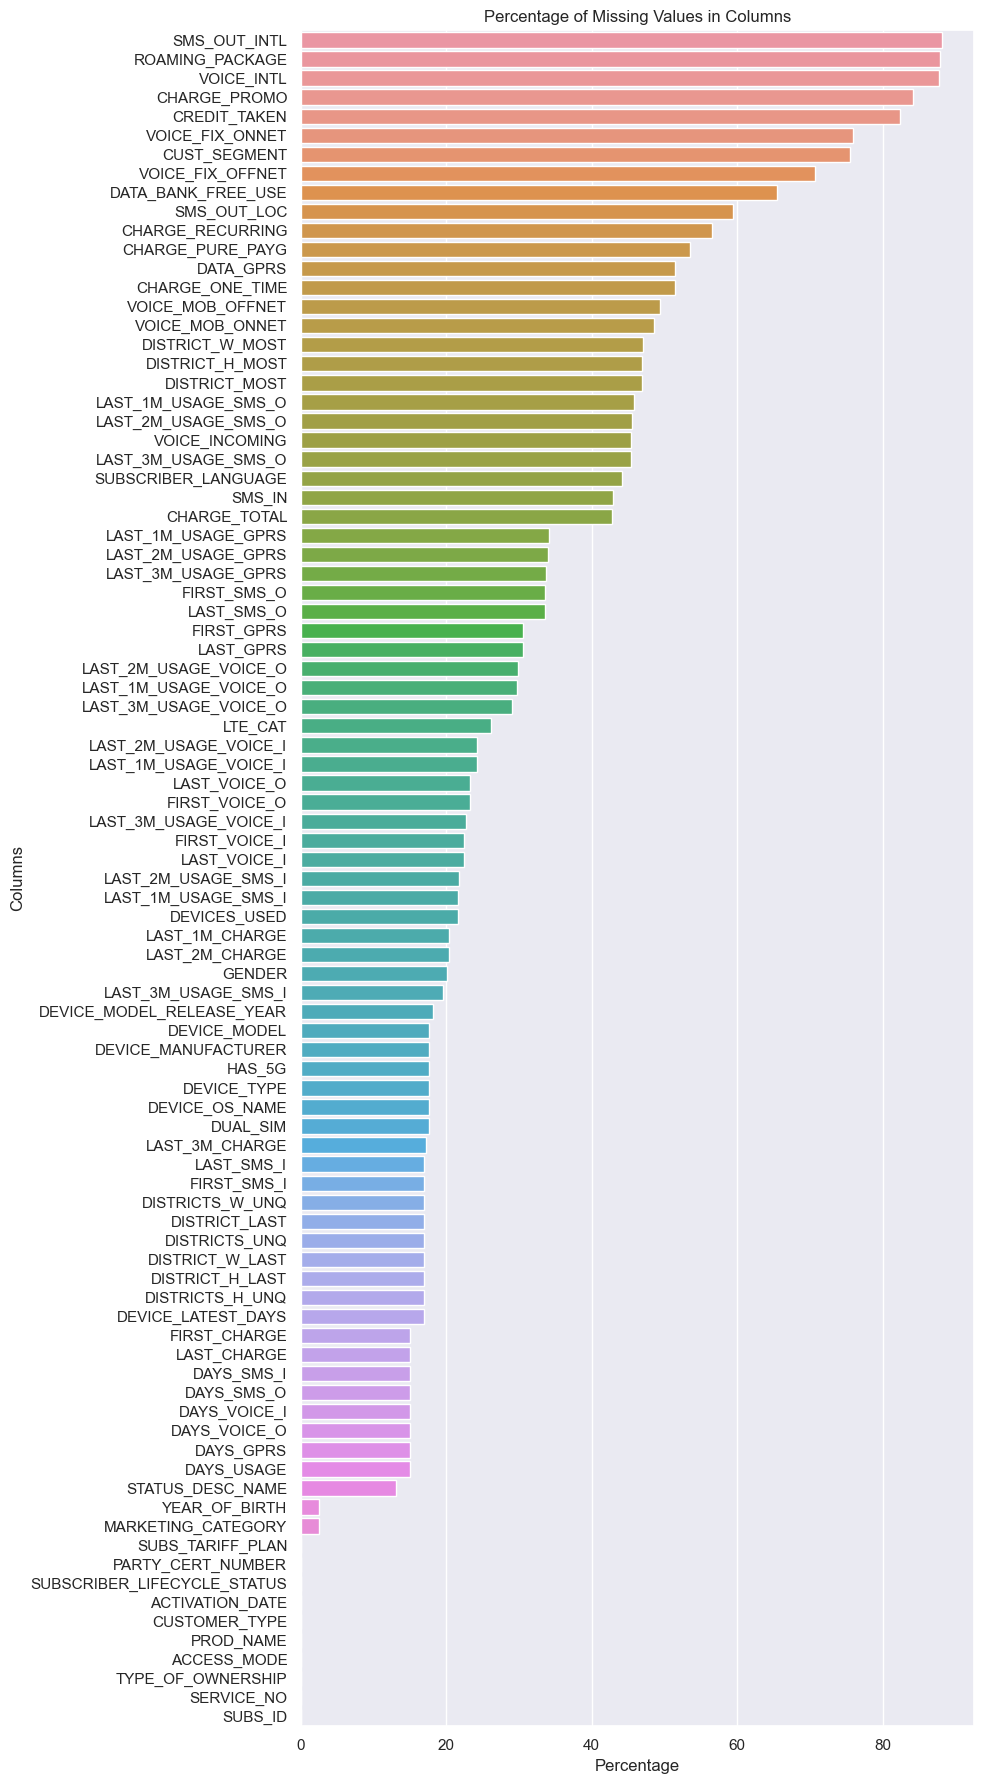

In [340]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sort missing value percentages in descending order
miss_values_sorted = miss_values.sort_values(by='Missing value (%)', ascending=False)

# Create a horizontal bar plot using Seaborn
plt.figure(figsize=(10, 18))
sns.barplot(y=miss_values_sorted.index, x='Missing value (%)', data=miss_values_sorted, orient='h')
plt.title('Percentage of Missing Values in Columns')
plt.xlabel('Percentage')
plt.ylabel('Columns')
plt.tight_layout()
plt.show()

# Silent Customers DataFrame : Silent_df

In [341]:
Silent_df = df[df["SUBSCRIBER_LIFECYCLE_STATUS"]=="Partial"]

### fill None values : 0.5 percentile

In [342]:
def fill_Nones( df, Priority_Cols):
    """
    Fill None values in numeric columns of a DataFrame with the median.

    Parameters:
    df (pandas.DataFrame): The DataFrame to fill None values in.
    variables (list, optional): A list of column names to restrict the filling to.

    Returns:
    Filling percentage of Priority_Cols : max=100
    """
    fill_count=0
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            median = df[col].quantile(0.5)
            if median==None:
                print("Warning")
                median = df[col].drop_na().quantile(0.5)
            df[col] = df[col].fillna(median)
            if col in variables:
                fill_count+=1
    return fill_count/len(Priority_Cols)*100
        

In [401]:
num_cols = list(df.select_dtypes(include=['number']).columns)
medians = df[num_cols].median()
df[num_cols] = df[num_cols].fillna(medians)


obj_cols = list(df.select_dtypes(include=['O']).columns)
modes = df[obj_cols].mode()
df[obj_cols] = df[obj_cols].fillna(medians)

### fill percentage in important variables

In [402]:
fill_Nones(Silent_df,variables)

100.0

In [403]:
Silent_df

,SUBS_ID,SERVICE_NO,PARTY_CERT_NUMBER,SUBSCRIBER_LIFECYCLE_STATUS,ACTIVATION_DATE,STATUS_DESC_NAME,SUBS_TARIFF_PLAN,PROD_NAME,ACCESS_MODE,TYPE_OF_OWNERSHIP,...,LAST_2M_USAGE_VOICE_I,LAST_2M_USAGE_SMS_O,LAST_2M_USAGE_SMS_I,LAST_2M_CHARGE,LAST_3M_USAGE_GPRS,LAST_3M_USAGE_VOICE_O,LAST_3M_USAGE_VOICE_I,LAST_3M_USAGE_SMS_O,LAST_3M_USAGE_SMS_I,LAST_3M_CHARGE
143,1.771072e+09,558550206,07001053109,Partial,2023-01-09 17:33:00,Partial by credit check,Lai-Lai standard,Mobile Phone,MOBILE,Individual person,...,21063.0,33.0,445.0,30.228315,1.495655e+10,12885.0,34014.0,204.0,632.0,47.115393
165,1.772134e+09,593145782,01001084097,Partial,2023-01-20 16:43:19,Partial by credit check,Lai-Lai standard,Mobile Phone,MOBILE,Individual person,...,4842.0,8.0,110.0,24.824644,5.521554e+08,3456.5,4646.0,8.0,173.0,7.900000
472,1.780588e+09,500051414,37001051124,Partial,2023-02-23 23:25:12,Partial by credit check,Lai-Lai standard,Mobile Phone,MOBILE,Individual person,...,5641.0,3.0,467.0,43.004244,1.364940e+10,11068.0,2561.0,4.0,393.0,28.875249
473,1.773992e+09,593369627,25001048883,Partial,2023-01-24 13:48:04,Partial by credit check,Lai-Lai standard,Mobile Phone,MOBILE,Individual person,...,1884.0,8.0,191.0,8.098242,3.420413e+10,1.0,5664.0,8.0,183.0,30.879492
590,1.776964e+09,557296607,01025013363,Partial,2023-03-10 15:44:54,Partial by no refil,Lai-Lai standard,Mobile Phone,MOBILE,Individual person,...,58.0,8.0,89.0,2.154295,1.629730e+06,27.0,55.0,8.0,73.0,1.852882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39361,1.779989e+09,555799064,01019022439,Partial,2023-05-01 10:36:46,Partial by credit check,Lai-Lai standard,Mobile Phone,MOBILE,Individual person,...,4933.0,8.0,98.0,55.999609,5.521554e+08,3456.5,4646.0,8.0,173.0,7.900000
39392,1.780963e+09,593995068,26001024836,Partial,2023-06-11 12:00:52,Partial by credit check,Lai-Lai standard,Mobile Phone,MOBILE,Individual person,...,4933.0,8.0,209.0,8.400000,5.521554e+08,3456.5,4646.0,8.0,173.0,7.900000
39513,1.778996e+09,593255175,01015014788,Partial,2023-02-14 16:11:50,Partial by credit check,Lai-Lai standard,Mobile Phone,MOBILE,Individual person,...,12047.0,26.0,338.0,18.094617,3.468410e+10,14105.0,12438.0,8.0,502.0,79.185015
39531,1.779393e+09,557337483,17001024371,Partial,2023-05-07 16:43:04,Partial by credit check,Lai-Lai standard,Mobile Phone,MOBILE,Individual person,...,4933.0,8.0,209.0,4.500000,5.521554e+08,3456.5,4646.0,8.0,173.0,7.900000


In [404]:
Silent_df [Silent_df["ACTIVATION_DATE"].dt.year >= 2023]["ACTIVATION_DATE"].mean()

Timestamp('2023-03-29 06:20:01.351247872')

In [405]:
Silent_df = Silent_df [Silent_df["ACTIVATION_DATE"].dt.year >= 2023]

# Silent None Values Count

In [406]:
def count_Nones( df, Priority_Cols):
    Silent_miss = pd.DataFrame({"Missing value (%)": Silent_df.isnull().sum()/len(df.index)*100})
    return Silent_miss[Silent_miss.index.isin(variables)]

count_Nones( Silent_df, variables)

,Missing value (%)
SUBS_ID,0.0
DEVICE_LATEST_DAYS,0.0
DEVICES_USED,0.0
CHARGE_TOTAL,0.0
CHARGE_PROMO,0.0
CHARGE_ONE_TIME,0.0
VOICE_MOB_ONNET,0.0
VOICE_MOB_OFFNET,0.0
VOICE_INCOMING,0.0
DATA_GPRS,0.0


In [407]:
Silent_df.describe()

,SUBS_ID,DEVICE_LATEST_DAYS,DEVICES_USED,DISTRICT_W_LAST,DISTRICT_W_MOST,DISTRICTS_W_UNQ,DISTRICT_H_LAST,DISTRICT_H_MOST,DISTRICTS_H_UNQ,DISTRICT_LAST,...,LAST_2M_USAGE_VOICE_I,LAST_2M_USAGE_SMS_O,LAST_2M_USAGE_SMS_I,LAST_2M_CHARGE,LAST_3M_USAGE_GPRS,LAST_3M_USAGE_VOICE_O,LAST_3M_USAGE_VOICE_I,LAST_3M_USAGE_SMS_O,LAST_3M_USAGE_SMS_I,LAST_3M_CHARGE
count,5.210000e+02,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000,521.00000,521.000000,...,521.000000,521.000000,521.000000,521.000000,5.210000e+02,521.000000,521.000000,521.000000,521.000000,521.000000
mean,1.765547e+09,54.911708,1.504798,52.180422,51.928983,1.381958,52.817658,51.420345,1.34357,51.610365,...,4761.840691,11.785029,167.975048,9.963755,7.884378e+09,4178.524952,4444.203455,13.391555,135.120921,10.132087
std,1.025685e+08,58.944758,0.888211,43.050798,42.885365,0.596448,43.408562,43.127248,0.57429,43.131639,...,5398.287352,35.179756,161.103387,14.066850,4.680067e+10,14008.357759,6335.535509,45.232819,134.397669,17.614979
min,9.341409e+08,1.000000,1.000000,11.000000,11.000000,1.000000,11.000000,11.000000,1.00000,11.000000,...,2.000000,0.000000,1.000000,0.000000,0.000000e+00,1.000000,3.000000,1.000000,1.000000,0.000000
25%,1.776095e+09,8.000000,1.000000,14.000000,14.000000,1.000000,14.000000,14.000000,1.00000,14.000000,...,1702.000000,8.000000,74.000000,0.500000,5.521554e+08,1546.000000,1219.000000,8.000000,44.000000,1.496249
50%,1.778923e+09,33.000000,1.000000,26.000000,26.000000,1.000000,26.000000,25.000000,1.00000,26.000000,...,4933.000000,8.000000,176.000000,8.400000,5.521554e+08,3456.500000,4646.000000,8.000000,142.000000,7.900000
75%,1.780957e+09,84.000000,2.000000,91.000000,91.000000,2.000000,93.000000,91.000000,2.00000,91.000000,...,4933.000000,8.000000,209.000000,8.799609,9.464375e+08,3456.500000,4646.000000,8.000000,173.000000,9.140000
max,1.786957e+09,251.000000,9.000000,137.000000,137.000000,4.000000,137.000000,137.000000,5.00000,137.000000,...,62917.000000,532.000000,1700.000000,128.741492,8.318615e+11,298330.000000,82796.000000,722.000000,1400.000000,289.994726


In [408]:
Not_Silent_df =  df [df["SUBSCRIBER_LIFECYCLE_STATUS"]!="Partial" ]


In [409]:
Not_Silent_df [Not_Silent_df["ACTIVATION_DATE"].dt.year >= 2023]

,SUBS_ID,SERVICE_NO,PARTY_CERT_NUMBER,SUBSCRIBER_LIFECYCLE_STATUS,ACTIVATION_DATE,STATUS_DESC_NAME,SUBS_TARIFF_PLAN,PROD_NAME,ACCESS_MODE,TYPE_OF_OWNERSHIP,...,LAST_2M_USAGE_VOICE_I,LAST_2M_USAGE_SMS_O,LAST_2M_USAGE_SMS_I,LAST_2M_CHARGE,LAST_3M_USAGE_GPRS,LAST_3M_USAGE_VOICE_O,LAST_3M_USAGE_VOICE_I,LAST_3M_USAGE_SMS_O,LAST_3M_USAGE_SMS_I,LAST_3M_CHARGE
153,1.771790e+09,555502760,35001020832,Forced,2023-01-17 12:35:28,Partial by no refil,Lai-Lai standard,Mobile Phone,MOBILE,Individual person,...,27.0,0.0,140.0,0.000000,2.560000e+05,202.0,192.0,0.0,139.0,0.000000
176,1.781947e+09,558166788,01015020453,Active,2023-06-05 18:29:42,Initial,Lai-Lai standard,Mobile Phone,MOBILE,Individual person,...,1077.5,0.0,99.0,1.000000,2.560000e+05,202.0,1047.5,0.0,82.0,1.136094
461,1.780198e+09,596444412,59001090153,Active,2023-02-09 12:30:16,None,Lai-Lai standard,Mobile Phone,MOBILE,Individual person,...,1468.0,6.0,93.0,0.571914,2.560000e+05,810.0,1263.0,0.0,76.0,0.000000
470,1.776852e+09,558659074,01001061835,Forced,2023-02-21 10:59:38,Partial by no refil,Lai-Lai standard,Mobile Phone,MOBILE,Individual person,...,1077.5,0.0,99.0,1.000000,4.817150e+09,2859.0,310.0,1.0,34.0,7.400000
599,1.779865e+09,593484498,01011023383,Active,2023-05-20 11:50:14,Partial by credit check,Lai-Lai standard,Mobile Phone,MOBILE,Individual person,...,3054.0,0.0,42.0,8.798500,2.560000e+05,202.0,1047.5,0.0,82.0,1.136094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39355,1.779964e+09,555464470,01001081599,Active,2023-04-13 10:27:04,Partial by credit check,Lai-Lai standard,Mobile Phone,MOBILE,Individual person,...,13747.0,1.0,160.0,33.956000,3.940768e+09,202.0,36.0,116.0,309.0,57.900000
39628,1.781940e+09,558118001,19001102378,Active,2023-06-26 12:17:44,Initial,Lai-Lai standard,Mobile Phone,MOBILE,Individual person,...,1077.5,0.0,99.0,1.000000,2.560000e+05,202.0,1047.5,0.0,82.0,1.136094
39659,1.782449e+09,557268813,03001021829,Active,2023-06-27 13:46:23,Initial,Lai-Lai standard,Mobile Phone,MOBILE,Individual person,...,1077.5,0.0,99.0,1.000000,2.560000e+05,202.0,1047.5,0.0,82.0,0.000000
39688,1.782692e+09,558196885,12001035838,Active,2023-06-20 14:25:10,Initial,Lai-Lai standard,Mobile Phone,MOBILE,Individual person,...,1077.5,0.0,99.0,1.000000,2.560000e+05,202.0,1047.5,0.0,82.0,0.000000


In [410]:
Not_Silent_df.head(5)

,SUBS_ID,SERVICE_NO,PARTY_CERT_NUMBER,SUBSCRIBER_LIFECYCLE_STATUS,ACTIVATION_DATE,STATUS_DESC_NAME,SUBS_TARIFF_PLAN,PROD_NAME,ACCESS_MODE,TYPE_OF_OWNERSHIP,...,LAST_2M_USAGE_VOICE_I,LAST_2M_USAGE_SMS_O,LAST_2M_USAGE_SMS_I,LAST_2M_CHARGE,LAST_3M_USAGE_GPRS,LAST_3M_USAGE_VOICE_O,LAST_3M_USAGE_VOICE_I,LAST_3M_USAGE_SMS_O,LAST_3M_USAGE_SMS_I,LAST_3M_CHARGE
0,2.570876e+07,557949776,08001023652,Active,2010-03-19 16:04:23,Partial by credit check,Lai-Lai standard,Mobile Phone,MOBILE,Individual person,...,9596.0,0.0,120.0,0.000000,2.560000e+05,6304.0,23066.0,13.0,157.0,9.435972
2,2.514739e+07,555253078,61001067765,Active,2011-10-31 12:57:04,Partial by credit check,Lai-Lai standard,Mobile Phone,MOBILE,Individual person,...,21233.0,1.0,201.0,4.629648,5.208005e+10,31198.0,30646.0,14.0,254.0,49.580885
4,2.441348e+07,557583435,53001043995,Active,2012-08-12 13:13:44,Partial by credit check,Lai-Lai standard,Mobile Phone,MOBILE,Individual person,...,874.0,0.0,105.0,11.552000,5.199683e+08,1179.0,653.0,2.0,100.0,12.036000
7,1.759411e+09,555140881,61004029244,Active,2022-01-21 14:14:14,Partial by credit check,Lai-Lai standard,Mobile Phone,MOBILE,Individual person,...,14794.0,24.0,434.0,20.239941,7.119744e+09,14307.0,9380.0,4.0,300.0,31.230819
8,2.682308e+07,555259243,28001010148,Active,2012-06-23 12:11:17,Partial by credit check,Lai-Lai standard,Mobile Phone,MOBILE,Individual person,...,8228.0,0.0,114.0,4.764000,2.560000e+05,234.0,35949.0,0.0,85.0,2.515814


In [411]:
fill_Nones(Not_Silent_df,variables)

100.0

In [412]:
Not_Silent_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16747 entries, 0 to 39744
Data columns (total 89 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   SUBS_ID                      16747 non-null  float64       
 1   SERVICE_NO                   16747 non-null  object        
 2   PARTY_CERT_NUMBER            16747 non-null  object        
 3   SUBSCRIBER_LIFECYCLE_STATUS  16747 non-null  object        
 4   ACTIVATION_DATE              16747 non-null  datetime64[ns]
 5   STATUS_DESC_NAME             13974 non-null  object        
 6   SUBS_TARIFF_PLAN             16747 non-null  object        
 7   PROD_NAME                    16747 non-null  object        
 8   ACCESS_MODE                  16747 non-null  object        
 9   TYPE_OF_OWNERSHIP            16747 non-null  object        
 10  CUSTOMER_TYPE                16747 non-null  object        
 11  CUST_SEGMENT                 3864 non-nul

In [413]:
count_Nones(Not_Silent_df, variables)

,Missing value (%)
SUBS_ID,0.0
DEVICE_LATEST_DAYS,0.0
DEVICES_USED,0.0
CHARGE_TOTAL,0.0
CHARGE_PROMO,0.0
CHARGE_ONE_TIME,0.0
VOICE_MOB_ONNET,0.0
VOICE_MOB_OFFNET,0.0
VOICE_INCOMING,0.0
DATA_GPRS,0.0


In [414]:
Not_Silent_df.describe()

,SUBS_ID,DEVICE_LATEST_DAYS,DEVICES_USED,DISTRICT_W_LAST,DISTRICT_W_MOST,DISTRICTS_W_UNQ,DISTRICT_H_LAST,DISTRICT_H_MOST,DISTRICTS_H_UNQ,DISTRICT_LAST,...,LAST_2M_USAGE_VOICE_I,LAST_2M_USAGE_SMS_O,LAST_2M_USAGE_SMS_I,LAST_2M_CHARGE,LAST_3M_USAGE_GPRS,LAST_3M_USAGE_VOICE_O,LAST_3M_USAGE_VOICE_I,LAST_3M_USAGE_SMS_O,LAST_3M_USAGE_SMS_I,LAST_3M_CHARGE
count,1.674700e+04,16747.000000,16747.000000,16747.000000,16747.000000,16747.000000,16747.000000,16747.000000,16747.000000,16747.000000,...,16747.000000,16747.000000,16747.000000,16747.000000,1.674700e+04,16747.000000,16747.000000,16747.000000,16747.000000,16747.000000
mean,5.338685e+08,278.631815,2.518779,42.569057,31.761092,1.654207,42.461157,32.026273,1.556159,42.594793,...,4073.146414,8.061922,162.115304,7.282231,4.707005e+09,3410.218009,3872.572879,8.686093,143.037499,7.242810
std,6.890883e+08,366.801808,2.067227,38.901762,29.739802,1.106761,38.912045,30.028123,0.955161,38.961308,...,9653.492047,61.057349,287.331060,16.188937,2.418870e+10,11567.794421,8979.512559,76.876528,272.653794,15.577734
min,7.039000e+03,1.000000,1.000000,11.000000,11.000000,1.000000,11.000000,11.000000,1.000000,11.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.752552e+07,37.000000,1.000000,14.000000,21.000000,1.000000,14.000000,21.000000,1.000000,14.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.063577e+07,159.000000,2.000000,21.000000,21.000000,1.000000,21.000000,21.000000,1.000000,21.000000,...,1077.500000,0.000000,99.000000,1.000000,2.560000e+05,202.000000,1047.500000,0.000000,82.000000,1.136094
75%,9.361075e+08,320.000000,3.000000,74.000000,21.000000,2.000000,73.000000,21.000000,2.000000,74.000000,...,2595.500000,0.000000,156.000000,5.696000,3.665505e+05,663.000000,2706.000000,0.000000,137.000000,6.400000
max,1.787043e+09,1645.000000,64.000000,138.000000,138.000000,14.000000,138.000000,138.000000,11.000000,138.000000,...,223813.000000,3936.000000,6927.000000,418.741097,1.025042e+12,583018.000000,268673.000000,4801.000000,9112.000000,323.077590


In [415]:
diff_df = (Silent_df.describe() - Not_Silent_df.describe())/(Silent_df.describe() + Not_Silent_df.describe())*100

In [416]:
diff_df

,SUBS_ID,DEVICE_LATEST_DAYS,DEVICES_USED,DISTRICT_W_LAST,DISTRICT_W_MOST,DISTRICTS_W_UNQ,DISTRICT_H_LAST,DISTRICT_H_MOST,DISTRICTS_H_UNQ,DISTRICT_LAST,...,LAST_2M_USAGE_VOICE_I,LAST_2M_USAGE_SMS_O,LAST_2M_USAGE_SMS_I,LAST_2M_CHARGE,LAST_3M_USAGE_GPRS,LAST_3M_USAGE_VOICE_O,LAST_3M_USAGE_VOICE_I,LAST_3M_USAGE_SMS_O,LAST_3M_USAGE_SMS_I,LAST_3M_CHARGE
count,-93.965717,-93.965717,-93.965717,-93.965717,-93.965717,-93.965717,-93.965717,-93.965717,-93.965717,-93.965717,...,-93.965717,-93.965717,-93.965717,-93.965717,-93.965717,-93.965717,-93.965717,-93.965717,-93.965717,-93.965717
mean,53.564849,-67.073737,-25.200979,10.143977,24.098307,-8.966871,10.869679,23.241292,-7.331348,9.570146,...,7.795080,18.759090,1.775194,15.548684,25.234498,10.124298,6.873223,21.313238,-2.846068,16.629032
std,-74.087639,-72.309931,-39.893101,5.062729,18.100562,-29.961821,5.462201,17.905896,-24.902445,5.080011,...,-28.270443,-26.889414,-28.148523,-7.013823,31.852610,9.542340,-17.263916,-25.914240,-33.965269,6.137628
min,99.998493,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,100.000000,NaN,100.000000,NaN,NaN,100.000000,100.000000,100.000000,100.000000,NaN
25%,96.947748,-64.444444,0.000000,0.000000,-20.000000,0.000000,0.000000,-20.000000,0.000000,0.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
50%,96.614006,-65.625000,-33.333333,10.638298,10.638298,0.000000,10.638298,8.695652,0.000000,10.638298,...,64.146078,100.000000,28.000000,78.723404,99.907315,88.957223,63.203653,100.000000,26.785714,74.854320
75%,31.094201,-58.415842,-20.000000,10.303030,62.500000,0.000000,12.048193,62.500000,0.000000,10.303030,...,31.048682,100.000000,14.520548,21.410685,99.922571,67.811628,26.387378,100.000000,11.612903,17.631918
max,-0.002406,-73.523207,-75.342466,-0.363636,-0.363636,-55.555556,-0.363636,-0.363636,-37.500000,-0.363636,...,-56.114114,-76.186213,-60.588849,-52.969649,-10.403365,-32.301429,-52.885745,-73.854789,-73.363775,-5.396242


### Difference % of Silent and Not_Silent Customers in Descriptive DataFrame
    formula used = Silent - Not_Silent / Silent + Not_Silent

### Check where is difference more than 15 %

In [417]:
diff_df_more15_pred = diff_df.applymap(lambda x : abs(x)>15 )

### Visualize of important variables

In [418]:
diff_df_more15 = diff_df [diff_df_more15_pred ]

In [419]:
diff_vars = diff_df_more15.loc["50%"].dropna()

In [420]:
variables = diff_vars.index.to_list()

In [421]:
diff_vars.sort_values(inplace=True)

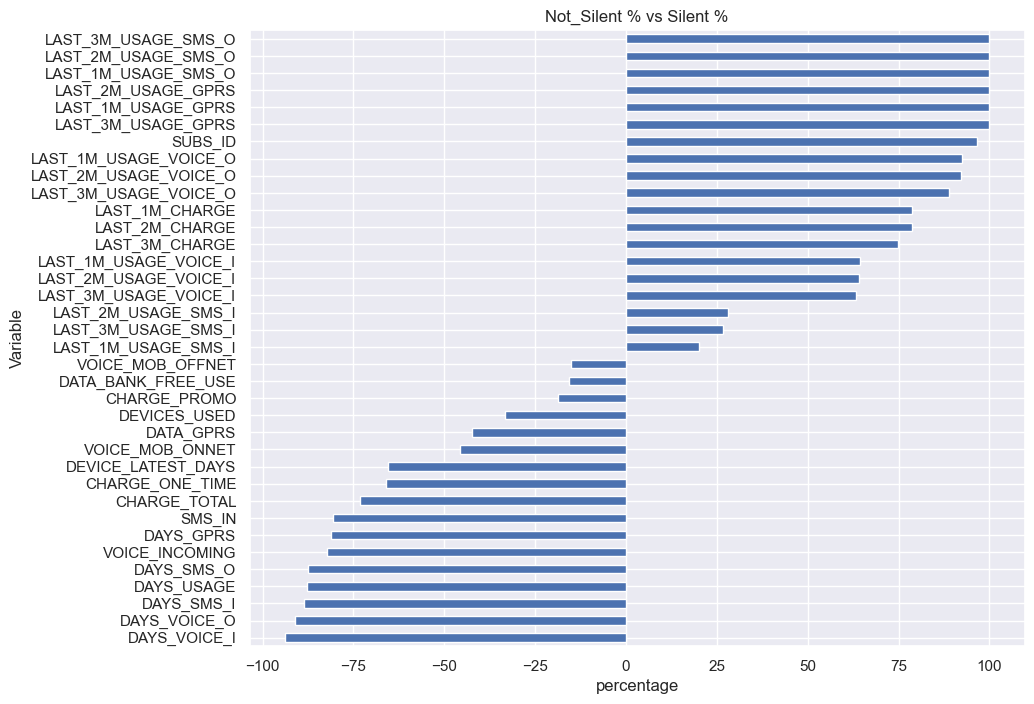

In [422]:
diff_vars.plot(kind='barh', figsize=(10, 8))
plt.xlabel('percentage')
plt.ylabel('Variable')
plt.title('Not_Silent % vs Silent %')
plt.show()

In [193]:
"""import pandas as pd
import matplotlib.pyplot as plt

# Calculate describe() for both DataFrames
describe_df1 = Silent_df.describe(include='all')
describe_df2 = Not_Silent_df.describe(include='all')

# Select the summary statistics to compare
summary_statistics = ['mean', 'max', 'min']

# Loop through each summary statistic and create side-by-side bar plots
for stat in summary_statistics:
    plt.figure(figsize=(10, 6))
    
    # Plot DataFrame 1's values for the current summary statistic
    plt.bar(describe_df1.columns, describe_df1.loc[stat], label='DataFrame 1', alpha=0.5)
    
    # Plot DataFrame 2's values for the current summary statistic
    plt.bar(describe_df2.columns, describe_df2.loc[stat], label='DataFrame 2', alpha=0.5)
    
    plt.title(f'{stat.capitalize()} Comparison')
    plt.xlabel('Columns')
    plt.ylabel(stat.capitalize())
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

"""

"import pandas as pd\nimport matplotlib.pyplot as plt\n\n# Calculate describe() for both DataFrames\ndescribe_df1 = Silent_df.describe(include='all')\ndescribe_df2 = Not_Silent_df.describe(include='all')\n\n# Select the summary statistics to compare\nsummary_statistics = ['mean', 'max', 'min']\n\n# Loop through each summary statistic and create side-by-side bar plots\nfor stat in summary_statistics:\n    plt.figure(figsize=(10, 6))\n    \n    # Plot DataFrame 1's values for the current summary statistic\n    plt.bar(describe_df1.columns, describe_df1.loc[stat], label='DataFrame 1', alpha=0.5)\n    \n    # Plot DataFrame 2's values for the current summary statistic\n    plt.bar(describe_df2.columns, describe_df2.loc[stat], label='DataFrame 2', alpha=0.5)\n    \n    plt.title(f'{stat.capitalize()} Comparison')\n    plt.xlabel('Columns')\n    plt.ylabel(stat.capitalize())\n    plt.legend()\n    plt.xticks(rotation=45)\n    plt.tight_layout()\n    plt.show()\n\n"

# Silent dataframe description with numeric values

In [194]:
Silent_desc_num = Silent_df.describe(include=["float64"])
Silent_desc_num.drop(columns="SUBS_ID")

,DEVICE_LATEST_DAYS,DEVICES_USED,DISTRICT_W_LAST,DISTRICT_W_MOST,DISTRICTS_W_UNQ,DISTRICT_H_LAST,DISTRICT_H_MOST,DISTRICTS_H_UNQ,DISTRICT_LAST,DISTRICT_MOST,...,LAST_2M_USAGE_VOICE_I,LAST_2M_USAGE_SMS_O,LAST_2M_USAGE_SMS_I,LAST_2M_CHARGE,LAST_3M_USAGE_GPRS,LAST_3M_USAGE_VOICE_O,LAST_3M_USAGE_VOICE_I,LAST_3M_USAGE_SMS_O,LAST_3M_USAGE_SMS_I,LAST_3M_CHARGE
count,4555.000000,4555.000000,4555.000000,4555.000000,4555.000000,4555.000000,4555.000000,4555.000000,4555.000000,4555.000000,...,4555.000000,4555.000000,4555.000000,4555.000000,4.555000e+03,4555.000000,4555.000000,4555.000000,4555.000000,4555.000000
mean,387.985730,3.485840,49.253787,45.678156,2.050055,49.443908,46.110428,1.875741,49.345115,45.891109,...,8726.118661,26.091109,320.872667,13.450322,7.695974e+09,7756.859495,8170.246762,26.050274,278.103403,12.828331
std,399.091243,2.823759,42.519846,41.371615,1.296984,42.696667,41.576729,1.105707,42.636645,41.491093,...,12141.674362,128.375553,368.840611,17.472558,2.661024e+10,14250.857459,11911.178370,109.422466,343.409587,16.955179
min,1.000000,1.000000,11.000000,11.000000,1.000000,11.000000,11.000000,1.000000,11.000000,11.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,79.500000,2.000000,14.000000,14.000000,1.000000,14.000000,14.000000,1.000000,14.000000,14.000000,...,1745.000000,8.000000,112.000000,0.923770,9.714688e+06,828.000000,1543.000000,8.000000,90.000000,0.801367
50%,251.000000,3.000000,22.000000,21.000000,2.000000,23.000000,21.000000,2.000000,22.000000,21.000000,...,4932.500000,8.000000,209.000000,8.400000,5.511069e+08,3398.000000,4646.000000,8.000000,173.000000,7.744313
75%,586.000000,4.000000,91.000000,81.000000,3.000000,91.000000,81.000000,2.000000,91.000000,81.000000,...,10709.000000,8.000000,393.000000,17.220293,2.666776e+09,8117.000000,9908.500000,8.000000,353.000000,16.899951
max,1645.000000,55.000000,138.000000,138.000000,15.000000,138.000000,138.000000,13.000000,138.000000,138.000000,...,233219.000000,5641.000000,7490.000000,129.602137,8.318615e+11,298330.000000,278639.000000,3469.000000,7132.000000,289.994726


In [195]:
Not_Silent_desc_num = Not_Silent_df.describe(include=["float64"])
Not_Silent_desc_num.drop(columns="SUBS_ID")

,DEVICE_LATEST_DAYS,DEVICES_USED,DISTRICT_W_LAST,DISTRICT_W_MOST,DISTRICTS_W_UNQ,DISTRICT_H_LAST,DISTRICT_H_MOST,DISTRICTS_H_UNQ,DISTRICT_LAST,DISTRICT_MOST,...,LAST_2M_USAGE_VOICE_I,LAST_2M_USAGE_SMS_O,LAST_2M_USAGE_SMS_I,LAST_2M_CHARGE,LAST_3M_USAGE_GPRS,LAST_3M_USAGE_VOICE_O,LAST_3M_USAGE_VOICE_I,LAST_3M_USAGE_SMS_O,LAST_3M_USAGE_SMS_I,LAST_3M_CHARGE
count,13224.000000,12341.000000,13227.000000,7041.000000,13227.000000,13227.000000,7067.000000,13227.000000,13227.000000,7067.000000,...,14884.000000,12209.000000,15215.000000,22393.000000,1.351300e+04,1.499300e+04,15138.000000,12228.000000,15607.000000,23577.000000
mean,310.502874,2.703995,48.309065,46.595228,1.828306,48.172450,47.129475,1.704166,48.341650,46.966464,...,4249.965265,11.058481,150.661453,11.551219,5.897174e+09,4.791238e+05,3983.455080,11.896140,133.115589,11.054254
std,406.891936,2.380936,41.944570,41.522428,1.186046,41.975285,41.740302,1.025141,42.010034,41.666996,...,10251.887744,71.278642,307.167098,19.327402,2.692477e+10,5.816507e+07,9466.275272,89.755771,286.940420,16.471226
min,1.000000,1.000000,11.000000,11.000000,1.000000,11.000000,11.000000,1.000000,11.000000,11.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,-0.300000
25%,20.000000,1.000000,14.000000,13.000000,1.000000,14.000000,13.000000,1.000000,14.000000,13.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,127.000000,2.000000,21.000000,21.000000,1.000000,21.000000,21.000000,1.000000,21.000000,21.000000,...,0.000000,0.000000,0.000000,3.015260,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,3.310000
75%,450.000000,3.000000,81.000000,81.000000,2.000000,81.000000,81.000000,2.000000,81.000000,81.000000,...,3713.250000,1.000000,184.000000,19.266667,6.144000e+06,1.978000e+03,3654.250000,1.000000,152.000000,17.873175
max,1645.000000,64.000000,138.000000,138.000000,14.000000,138.000000,138.000000,11.000000,138.000000,138.000000,...,223813.000000,3936.000000,6927.000000,1399.000000,1.025042e+12,7.122079e+09,268673.000000,4801.000000,9112.000000,323.077590


In [196]:
DISTRICT = [i for i in Silent_desc_num.columns if i.startswith('DISTRICT')]
DISTRICT

['DISTRICT_W_LAST',
 'DISTRICT_W_MOST',
 'DISTRICTS_W_UNQ',
 'DISTRICT_H_LAST',
 'DISTRICT_H_MOST',
 'DISTRICTS_H_UNQ',
 'DISTRICT_LAST',
 'DISTRICT_MOST',
 'DISTRICTS_UNQ']

In [197]:
DISTRICT_not = [i for i in Not_Silent_desc_num.columns if i.startswith('DISTRICT')]
DISTRICT_not

['DISTRICT_W_LAST',
 'DISTRICT_W_MOST',
 'DISTRICTS_W_UNQ',
 'DISTRICT_H_LAST',
 'DISTRICT_H_MOST',
 'DISTRICTS_H_UNQ',
 'DISTRICT_LAST',
 'DISTRICT_MOST',
 'DISTRICTS_UNQ']

In [198]:
Silent_Districts = Silent_desc_num[DISTRICT]
Silent_Districts

,DISTRICT_W_LAST,DISTRICT_W_MOST,DISTRICTS_W_UNQ,DISTRICT_H_LAST,DISTRICT_H_MOST,DISTRICTS_H_UNQ,DISTRICT_LAST,DISTRICT_MOST,DISTRICTS_UNQ
count,4555.000000,4555.000000,4555.000000,4555.000000,4555.000000,4555.000000,4555.000000,4555.000000,4555.000000
mean,49.253787,45.678156,2.050055,49.443908,46.110428,1.875741,49.345115,45.891109,1.965093
std,42.519846,41.371615,1.296984,42.696667,41.576729,1.105707,42.636645,41.491093,1.197774
min,11.000000,11.000000,1.000000,11.000000,11.000000,1.000000,11.000000,11.000000,1.000000
25%,14.000000,14.000000,1.000000,14.000000,14.000000,1.000000,14.000000,14.000000,1.000000
50%,22.000000,21.000000,2.000000,23.000000,21.000000,2.000000,22.000000,21.000000,2.000000
75%,91.000000,81.000000,3.000000,91.000000,81.000000,2.000000,91.000000,81.000000,2.000000
max,138.000000,138.000000,15.000000,138.000000,138.000000,13.000000,138.000000,138.000000,17.000000


In [199]:
Not_Silent_Districts = Not_Silent_desc_num[DISTRICT_not]
Not_Silent_Districts

,DISTRICT_W_LAST,DISTRICT_W_MOST,DISTRICTS_W_UNQ,DISTRICT_H_LAST,DISTRICT_H_MOST,DISTRICTS_H_UNQ,DISTRICT_LAST,DISTRICT_MOST,DISTRICTS_UNQ
count,13227.000000,7041.000000,13227.000000,13227.000000,7067.000000,13227.000000,13227.000000,7067.000000,13227.000000
mean,48.309065,46.595228,1.828306,48.172450,47.129475,1.704166,48.341650,46.966464,1.766992
std,41.944570,41.522428,1.186046,41.975285,41.740302,1.025141,42.010034,41.666996,1.103171
min,11.000000,11.000000,1.000000,11.000000,11.000000,1.000000,11.000000,11.000000,1.000000
25%,14.000000,13.000000,1.000000,14.000000,13.000000,1.000000,14.000000,13.000000,1.000000
50%,21.000000,21.000000,1.000000,21.000000,21.000000,1.000000,21.000000,21.000000,1.000000
75%,81.000000,81.000000,2.000000,81.000000,81.000000,2.000000,81.000000,81.000000,2.000000
max,138.000000,138.000000,14.000000,138.000000,138.000000,11.000000,138.000000,138.000000,11.000000


In [200]:
Silent_Districts - Not_Silent_Districts

,DISTRICT_W_LAST,DISTRICT_W_MOST,DISTRICTS_W_UNQ,DISTRICT_H_LAST,DISTRICT_H_MOST,DISTRICTS_H_UNQ,DISTRICT_LAST,DISTRICT_MOST,DISTRICTS_UNQ
count,-8672.000000,-2486.000000,-8672.000000,-8672.000000,-2512.000000,-8672.000000,-8672.000000,-2512.000000,-8672.000000
mean,0.944722,-0.917072,0.221749,1.271458,-1.019047,0.171575,1.003466,-1.075355,0.198102
std,0.575277,-0.150813,0.110938,0.721382,-0.163573,0.080566,0.626611,-0.175904,0.094602
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,1.000000,0.000000,1.000000,2.000000,0.000000,1.000000,1.000000,0.000000,1.000000
75%,10.000000,0.000000,1.000000,10.000000,0.000000,0.000000,10.000000,0.000000,0.000000
max,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,6.000000


# Silent dataframe description with DateTimes

In [201]:
Silent_desc_time = Silent_df.describe(include=["datetime64"])
Silent_desc_time

,ACTIVATION_DATE,FIRST_GPRS,FIRST_VOICE_O,FIRST_VOICE_I,FIRST_SMS_O,FIRST_SMS_I,FIRST_CHARGE,LAST_GPRS,LAST_VOICE_O,LAST_VOICE_I,LAST_SMS_O,LAST_SMS_I,LAST_CHARGE
count,4555,4091,4256,4256,3849,4426,4553,4091,4256,4256,3849,4426,4553
unique,4527,1251,1095,1092,1172,1114,598,395,402,300,663,327,349
top,1992-01-01 00:00:01,2019-01-01 00:00:00,2019-01-01 00:00:00,2019-01-01 00:00:00,2019-01-01 00:00:00,2019-01-01 00:00:00,2019-01-01 00:00:00,2023-07-04 00:00:00,2023-07-03 00:00:00,2023-07-03 00:00:00,2023-07-03 00:00:00,2023-07-03 00:00:00,2023-07-03 00:00:00
freq,8,819,1418,1794,574,1431,2048,670,1581,2414,379,2658,467
first,1992-01-01 00:00:01,2019-01-01 00:00:00,2019-01-01 00:00:00,2019-01-01 00:00:00,2019-01-01 00:00:00,2019-01-01 00:00:00,2019-01-01 00:00:00,2019-05-04 00:00:00,2019-01-11 00:00:00,2019-01-14 00:00:00,2019-01-06 00:00:00,2019-01-23 00:00:00,2019-01-23 00:00:00
last,2023-07-02 12:58:08,2023-07-03 00:00:00,2023-07-03 00:00:00,2023-07-03 00:00:00,2023-07-03 00:00:00,2023-07-02 00:00:00,2023-07-02 00:00:00,2023-07-04 00:00:00,2023-07-04 00:00:00,2023-07-04 00:00:00,2023-07-04 00:00:00,2023-07-04 00:00:00,2023-07-04 00:00:00
